# Indicadores diarios
##### Web Scraping para extraer indicadores diarios actualizados

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# url = "https://si3.bcentral.cl/indicadoressiete/secure/indicadoresdiarios.aspx"
url = 'https://si3.bcentral.cl/indicadoressiete/secure/Serie.aspx?gcode=PRE_TCO&param=RABmAFYAWQB3AGYAaQBuAEkALQAzADUAbgBNAGgAaAAkADUAVwBQAC4AbQBYADAARwBOAGUAYwBjACMAQQBaAHAARgBhAGcAUABTAGUAdwA1ADQAMQA0AE0AawBLAF8AdQBDACQASABzAG0AXwA2AHQAawBvAFcAZwBKAEwAegBzAF8AbgBMAHIAYgBDAC4ARQA3AFUAVwB4AFIAWQBhAEEAOABkAHkAZwAxAEEARAA='

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

# Encuentra la tabla por su clase
tabla_element = soup.find("table", class_="table")

# Inicializa listas para las filas y columnas
filas = []
columnas = []

# Itera sobre las filas de la tabla
for fila in tabla_element.find_all("tr"):
    # Inicializa una lista para las celdas de la fila actual
    celdas = []
    # Itera sobre las celdas de la fila
    for celda in fila.find_all(["th", "td"]):
        celdas.append(celda.text.strip())
    # Agrega la lista de celdas a la lista de filas
    filas.append(celdas)

# Convierte la lista de filas en un DataFrame de Pandas
df = pd.DataFrame(filas)

In [2]:
df = df.iloc[1:, :]# Elimina la primera fila
df.dropna(axis=1, how='all', inplace=True)# Elimina columnas con todos los valores nulos
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns={"DÃ­a": "dia"})

In [7]:
df_melted = df.melt(id_vars=['dia'], var_name='mes', value_name='valor') #df transposed
# Crear un diccionario de meses en español a números
meses_a_numeros = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Septiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

df_melted['mes'] = df_melted['mes'].map(meses_a_numeros)
df_melted['date'] = df_melted['dia'] + '/' + df_melted['mes'] + '/2024'
df_melted['valor'] = df_melted['valor'].replace('',0).str.replace(',', '.').astype(float)
df_melted.dropna(axis=0, how='any', inplace=True)
df_melted['date'] = pd.to_datetime(df_melted['date'], format='%d/%m/%Y')

C:\Users\ivana\AppData\Local\Temp\ipykernel_7604\88738298.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


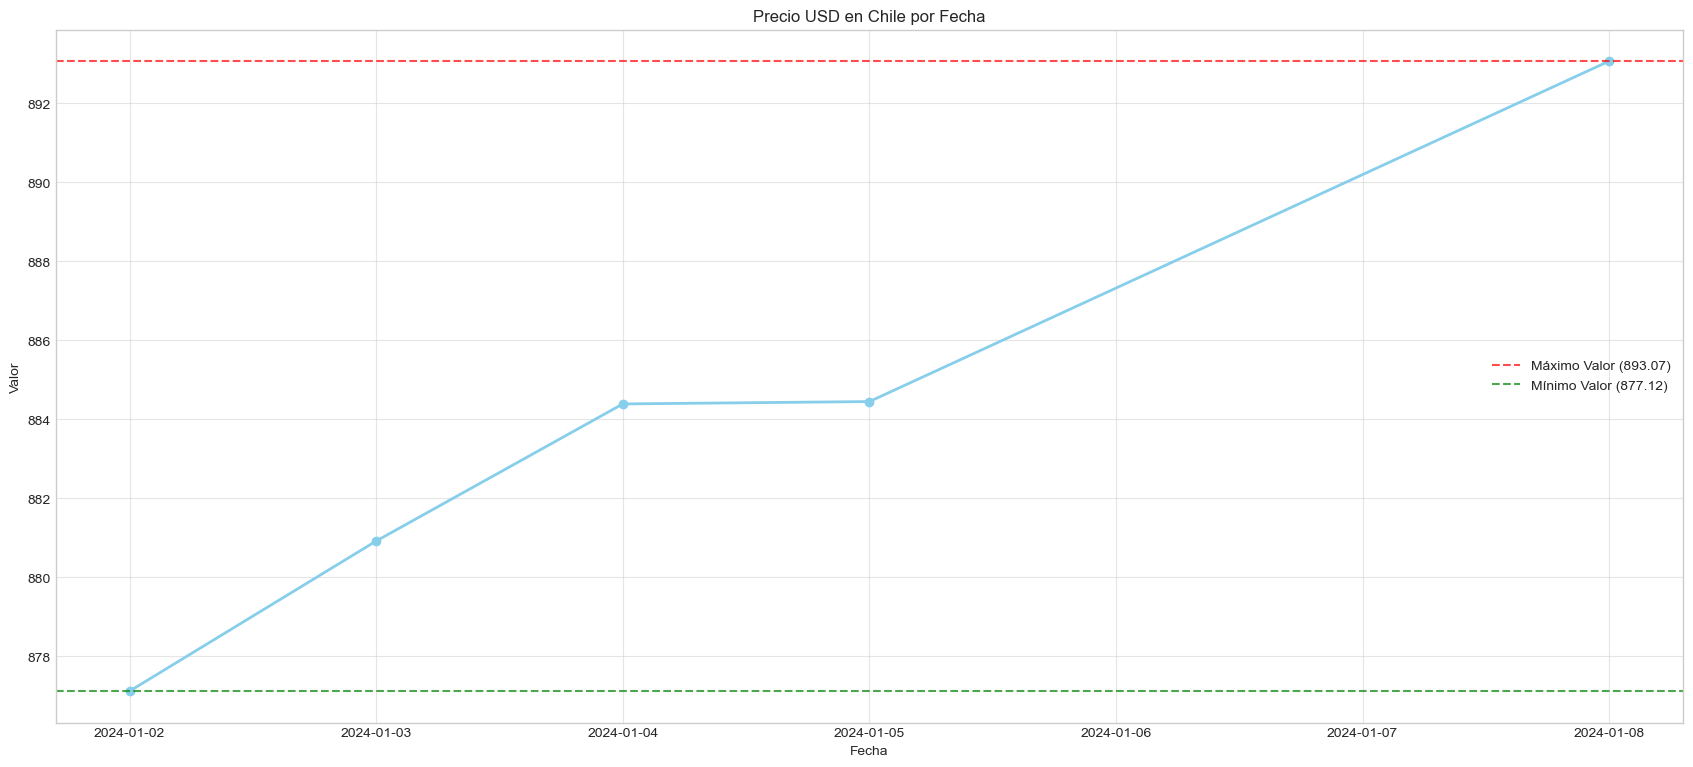

In [8]:
# Asegúrate de que la columna 'date' esté en formato datetime
df_melted['date'] = pd.to_datetime(df_melted['date'], format='%d/%m')

# Ordena el DataFrame por fecha
df_melted = df_melted.sort_values('date')

# Ajustar el estilo del gráfico
plt.style.use('seaborn-whitegrid')

# Configuraciones de tamaño y formato
plt.figure(figsize=(21, 9))

# Graficar
plt.plot(df_melted['date'], df_melted['valor'], marker='o', color='skyblue', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Precio USD en Chile por Fecha')

# Calcular valor máximo y mínimo
max_valor = df_melted['valor'].max()
min_valor = df_melted['valor'].min()

# Añadir líneas para el valor máximo y mínimo
plt.axhline(y=max_valor, color='red', linestyle='--', label=f'Máximo Valor ({max_valor:.2f})', alpha=0.7)
plt.axhline(y=min_valor, color='green', linestyle='--', label=f'Mínimo Valor ({min_valor:.2f})', alpha=0.7)

# Añadir leyenda
plt.legend()
plt.grid(True, alpha=0.5)

# Mostrar el gráfico
plt.show()